# Hydrogen Wave Function



In [1]:
#Import libraries
from numpy import *
import matplotlib.pyplot as plt
from sympy.physics.hydrogen import Psi_nlm

## Analytical Equation
$$
\psi_{n \ell m}(r, \theta, \varphi)=\sqrt{\left(\frac{2}{n a_{0}^{*}}\right)^{3} \frac{(n-\ell-1) !}{2 n(n+\ell) !}} e^{-\rho / 2} \rho^{\ell} L_{n-\ell-1}^{2 \ell+1}(\rho) Y_{\ell}^{m}(\theta, \varphi)
$$

In [2]:
#Hydrogen wave function
#Points array contains r and θ for fixed ϕ=0
def wavefunc(point,n,l,m,Z=1):
    r=point[0]
    θ=point[1]
    return abs(Psi_nlm(n,l,m,r,0,θ,Z))

In [3]:
#Transform polar coordinates into cartesian to plot
def polar2cart(r, theta):
    return (
         r * cos(theta),
         r * sin(theta)
    )

In [4]:
#2D polar variables
# 0.01 < r < 5  &  0 < θ < 2π
r = linspace(0.01,5,50)
θ = linspace(0,2*pi,200)

In [5]:
#Create polar grid
grid = []
for i in r:
    for j in θ:
            grid.append([i,j])
grid = array(grid)      

In [6]:
#Cartesian grid
x, y = array((polar2cart(grid[:,0],grid[:,1])))

In [7]:
#Import parallel libraries
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()

In [8]:
#Call wavefunc in parallel 
n, l, m = 1 ,0 ,0
results = Parallel(n_jobs=num_cores)(delayed(wavefunc)(i,n,l,m) for i in grid)

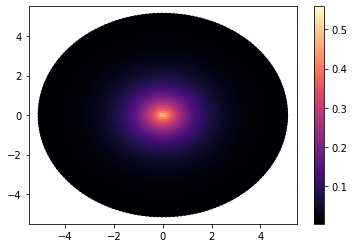

In [9]:
#Plot figure
fig = plt.figure()
plt.scatter(x, y,c=results,cmap="magma")
plt.colorbar()
plt.show()
